fe yy
BOE) alnttrormt cs
ate
"Sahil Khan
ob Jobs
Father Name
Muhammad Khan
wes
Gender Country of Stay
M Pakistan
Identity Number [Date of 8
38303-3933740-7 asa
Date of issue Tate of Expiry
29.07.2019 | 29.07.2029

PAKISTAN National Identity Card

Holder's Signature



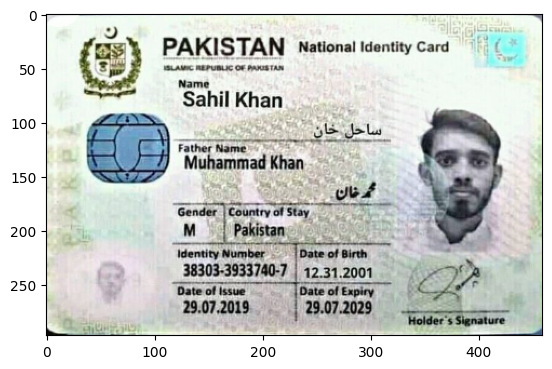

In [25]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from pytesseract import Output
import re

img = cv2.imread("r1.png")
plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
#plt.imshow(threshed)

text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="eng")
print(text2)

#text = text1[text1.conf != -1]
#lines = text.groupby('block_num')['text'].apply(list)
#conf = text.groupby(['block_num'])['conf'].mean()

In [31]:

ocr_output = text2

# Extracting Name
name_pattern = re.compile(r'"(.*?)"')
name_match = name_pattern.search(ocr_output)
name = name_match.group(1) if name_match else None
print(f"Name: {name}")

# Extracting Father Name
father_name_pattern = re.compile(r'Father Name\n(.*?)\n')
father_name_match = father_name_pattern.search(ocr_output)
father_name = father_name_match.group(1) if father_name_match else None
print(f"Father Name: {father_name}")

# Extracting Gender and Country of Stay
gender_country_pattern = re.compile(r'Gender (M|F)\nCountry of Stay\nPakistan\n')
gender_country_match = gender_country_pattern.search(ocr_output)
gender = gender_country_match.group(1) if gender_country_match else None
country_of_stay = "Pakistan"
print(f"Gender: {gender}")
print(f"Country of Stay: {country_of_stay}")

# Extracting Identity Number
identity_number_pattern = re.compile(r'Identity Number \[Date of (\d+)\n(.*?)\n')
identity_number_match = identity_number_pattern.search(ocr_output)
identity_number = identity_number_match.group(2) if identity_number_match else None
date_of_birth = identity_number_match.group(1) if identity_number_match else None
print(f"Identity Number: {identity_number}")
print(f"Date of Birth: {date_of_birth}")

# Extracting Date of Issue and Date of Expiry
dates_pattern = re.compile(r'Date of issue Date of Expiry\n(.*?) \| (.*?)\n')
dates_match = dates_pattern.search(ocr_output)
date_of_issue = dates_match.group(1) if dates_match else None
date_of_expiry = dates_match.group(2) if dates_match else None
print(f"Date of Issue: {date_of_issue}")
print(f"Date of Expiry: {date_of_expiry}")

Name: None
Father Name: Muhammad Khan
Gender: None
Country of Stay: Pakistan
Identity Number: 38303-3933740-7 asa
Date of Birth: 8
Date of Issue: None
Date of Expiry: None
Gender: None


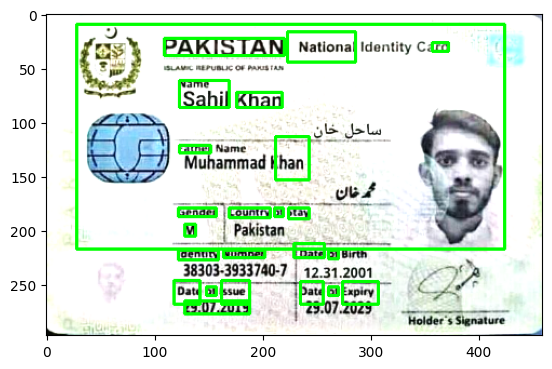

In [19]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img)